# 1. Entropy drift, take 2

In [1]:
import os
import sys
sys.path.append('../examples')
sys.path.append('../jobs')
sys.path.append('../training_data')

from tqdm import trange

import torch
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from transformers import GPT2LMHeadModel, GPT2Tokenizer, GPT2Config
from generate_with_entropy import sample_sequence, sample_sequence_batch

import logging
logging.getLogger('transformers.tokenization_utils').setLevel(logging.ERROR)

To use data.metrics please install scikit-learn. See https://scikit-learn.org/stable/index.html


In [2]:
# setup cell

def set_seed(seed=42, n_gpu=0):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(args.seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpus = torch.cuda.device_count()

set_seed()
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.to(device)
model.eval()

vocab_size = tokenizer.vocab_size

12/28/2019 10:48:46 - INFO - transformers.configuration_utils -   loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-config.json from cache at /u/myhu/.cache/torch/transformers/4be02c5697d91738003fb1685c9872f284166aa32e061576bbe6aaeb95649fcf.085d5f6a8e7812ea05ff0e6ed0645ab2e75d80387ad55c1ad9806ee70d272f80
12/28/2019 10:48:46 - INFO - transformers.configuration_utils -   Model config {
  "attn_pdrop": 0.1,
  "embd_pdrop": 0.1,
  "finetuning_task": null,
  "initializer_range": 0.02,
  "is_decoder": false,
  "layer_norm_epsilon": 1e-05,
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_layer": 12,
  "n_positions": 1024,
  "num_labels": 1,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pruned_heads": {},
  "resid_pdrop": 0.1,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "torchscript": false,
  "use_bf

In [3]:
# generation, no truncation

file = '../training_data/gbw/test/100_lines.txt'
length = 100

In [ ]:
# full gen, take 2
# turned off gradients for entropy, imported other method to deal with combining batches.
k = 0

with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            ents = sample_sequence_batch(
                model=model,
                context=context,
                length=length,
                tokenizer=tokenizer,
                temperature=1,
                top_k=k,
                top_p=0.0,
                batch_size=32,
                num_samples=128,
                is_xlnet=False,
                device=device
            )
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

In [6]:
save_ents = np.zeros((5, length))
save_ents[0, :] = avg_ents.cpu().numpy()[0]

In [ ]:
# full gen, take 2
k = 2048

with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            ents = sample_sequence_batch(
                model=model,
                context=context,
                length=length,
                tokenizer=tokenizer,
                temperature=1,
                top_k=k,
                top_p=0.0,
                batch_size=32,
                num_samples=128,
                is_xlnet=False,
                device=device
            )
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

100%|██████████| 100/100 [00:08<00:00,  7.78it/s]


 86%|████████▌ | 86/100 [00:07<00:01,  8.18it/s]

In [8]:
save_ents[1, :] = avg_ents.cpu().numpy()[0]

In [9]:
# full gen, take 2
k = 512

with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            ents = sample_sequence_batch(
                model=model,
                context=context,
                length=length,
                tokenizer=tokenizer,
                temperature=1,
                top_k=k,
                top_p=0.0,
                batch_size=32,
                num_samples=128,
                is_xlnet=False,
                device=device
            )
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

100%|██████████| 100/100 [00:08<00:00,  7.77it/s]


100%|██████████| 100/100 [00:08<00:00,  7.77it/s]


In [11]:
save_ents[2, :] = avg_ents.cpu().numpy()[0]

In [13]:
# full gen, take 2
k = 128

with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            ents = sample_sequence_batch(
                model=model,
                context=context,
                length=length,
                tokenizer=tokenizer,
                temperature=1,
                top_k=k,
                top_p=0.0,
                batch_size=32,
                num_samples=128,
                is_xlnet=False,
                device=device
            )
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

100%|██████████| 100/100 [00:08<00:00,  7.77it/s]


100%|██████████| 100/100 [00:08<00:00,  7.78it/s]


In [ ]:
save_ents[3, :] = avg_ents.cpu().numpy()[0]

In [28]:
# full gen, take 2
k = 40

with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            ents = sample_sequence_batch(
                model=model,
                context=context,
                length=length,
                tokenizer=tokenizer,
                temperature=1,
                top_k=k,
                top_p=0.0,
                batch_size=32,
                num_samples=128,
                is_xlnet=False,
                device=device
            )
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

100%|██████████| 100/100 [00:06<00:00,  8.73it/s]


100%|██████████| 100/100 [00:08<00:00,  7.78it/s]


100%|██████████| 100/100 [00:08<00:00,  7.78it/s]


In [29]:
save_ents[4, :] = avg_ents.cpu().numpy()[0]

Text(0.5, 1.0, 'Entropy blowup post 20')

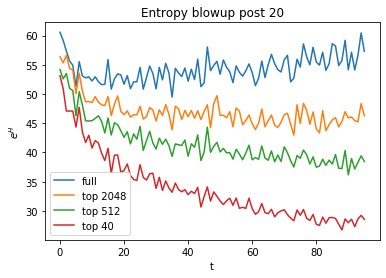

In [35]:
# why is there this weird spike at token 3 or so?

plt.plot(np.exp(save_ents[0, 4:]), label='full')
plt.plot(np.exp(save_ents[1, 4:]), label='top 2048')
plt.plot(np.exp(save_ents[2, 4:]), label='top 512')
plt.plot(np.exp(save_ents[4, 4:]), label='top 40')
plt.xlabel('t')
plt.ylabel('$e^H$')
plt.legend()
plt.title('Entropy blowup post 20')

Text(0.5, 1.0, 'Entropy blowup')

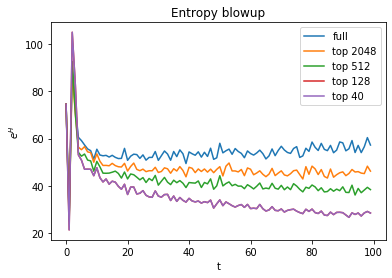

In [31]:
plt.plot(np.exp(save_ents[0, :]), label='full')
plt.plot(np.exp(save_ents[1, :]), label='top 2048')
plt.plot(np.exp(save_ents[2, :]), label='top 512')
plt.plot(np.exp(save_ents[3, :]), label='top 128')
plt.plot(np.exp(save_ents[4, :]), label='top 40')
plt.xlabel('t')
plt.ylabel('$e^H$')
plt.legend()
plt.title('Entropy blowup')

In [36]:
np.savez('cache_2', save_ents=save_ents)

In [37]:
# probing what happens to top 40 as we go for longer
length = 150
k = 40

with torch.no_grad():
    avg_ents = torch.zeros((1, length), device=device)
    i = 0
    with open(file) as fp:
        for line in fp:
            context = tokenizer.encode(line)
            ents = sample_sequence_batch(
                model=model,
                context=context,
                length=length,
                tokenizer=tokenizer,
                temperature=1,
                top_k=k,
                top_p=0.0,
                batch_size=32,
                num_samples=128,
                is_xlnet=False,
                device=device
            )
            ents = ents.mean(axis=0)
            avg_ents = (avg_ents * i + ents) / (i + 1)
            i += 1

100%|██████████| 150/150 [00:14<00:00,  6.07it/s]


100%|██████████| 150/150 [00:16<00:00,  5.57it/s]


100%|██████████| 150/150 [00:16<00:00,  5.57it/s]


In [38]:
np.savez('top40_long', avg_ents=avg_ents.cpu().numpy())

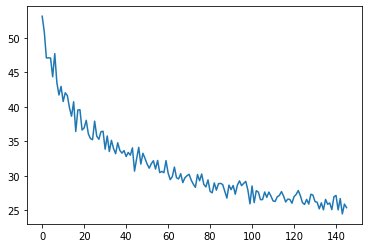

In [42]:
test = avg_ents.cpu().numpy()[0]
plt.plot(np.exp(test[4:]))